<a href="https://colab.research.google.com/github/anurag1517/House_Price_Prediction/blob/main/Boston_Housing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boston - boston - boston - boston - boston - boston - boston - boston.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.skew()

,0
CRIM,5.223149
ZN,2.225666
INDUS,0.295022
CHAS,3.405904
NOX,0.729308
RM,0.403612
AGE,-0.598963
DIS,1.011781
RAD,1.004815
TAX,0.669956


In [6]:
normalize = ['CRIM','ZN','B']

In [7]:
from sklearn import preprocessing
from scipy import stats

df2 = df.copy()
for col in normalize:
  min_val = df2[col].min()
  if min_val<=0:
    change = abs(min_val)+1e-6
    df2[col] = df2[col] + change
  xt,lambda_val = stats.boxcox(df2[col])
  df2[col] = xt
 # print(xt,lambda_val)

In [8]:
df2.skew()

,0
CRIM,0.093649
ZN,1.069256
INDUS,0.295022
CHAS,3.405904
NOX,0.729308
RM,0.403612
AGE,-0.598963
DIS,1.011781
RAD,1.004815
TAX,0.669956


In [9]:
df.skew()

,0
CRIM,5.223149
ZN,2.225666
INDUS,0.295022
CHAS,3.405904
NOX,0.729308
RM,0.403612
AGE,-0.598963
DIS,1.011781
RAD,1.004815
TAX,0.669956


In [10]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    for i in range(len(df[column])):
        if df.at[i, column] < lower_bound:
            df.at[i, column] = lower_bound
        elif df.at[i, column] > upper_bound:
            df.at[i, column] = upper_bound

    return df


numerical_cols = df2.select_dtypes(include=np.number).columns
for col in numerical_cols:
  if col!='CHAS':
    df2 = remove_outliers_iqr(df2, col)


In [11]:
print(df.shape)
print(df2.shape)

(506, 14)
(506, 14)


In [12]:
df2.skew()

,0
CRIM,0.093649
ZN,1.069256
INDUS,0.295022
CHAS,3.405904
NOX,0.729308
RM,0.296640
AGE,-0.598963
DIS,0.908467
RAD,1.004815
TAX,0.669956


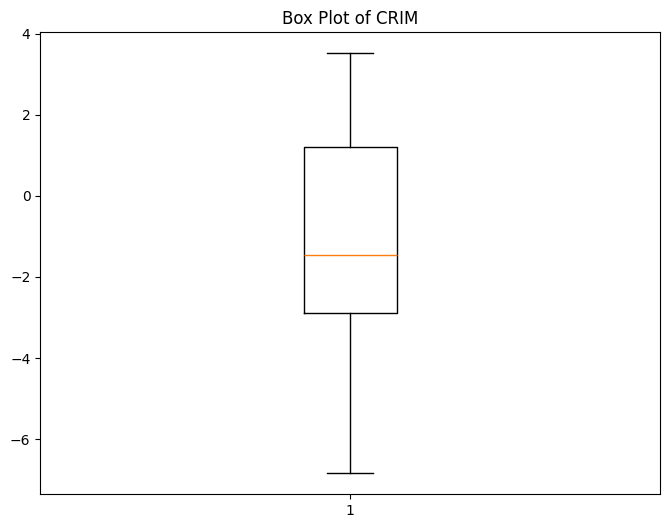

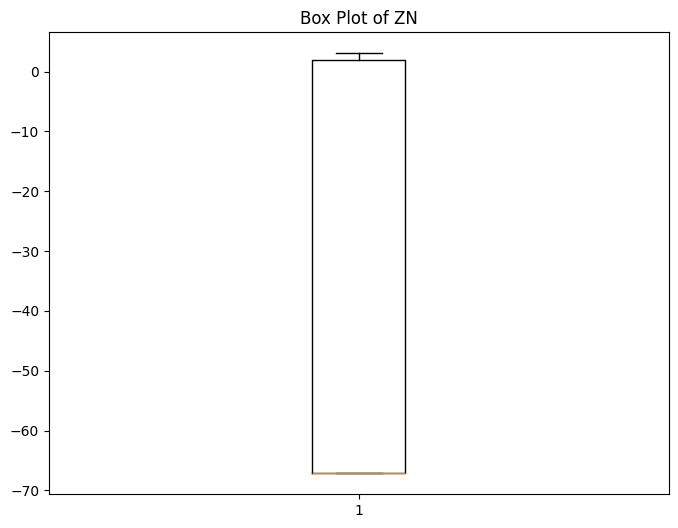

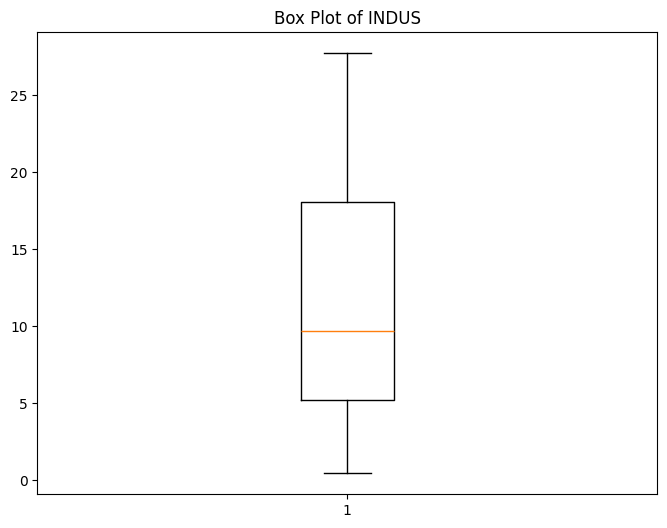

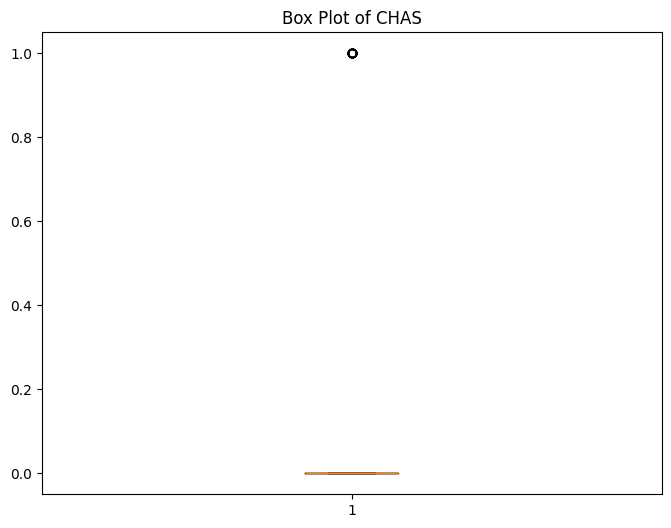

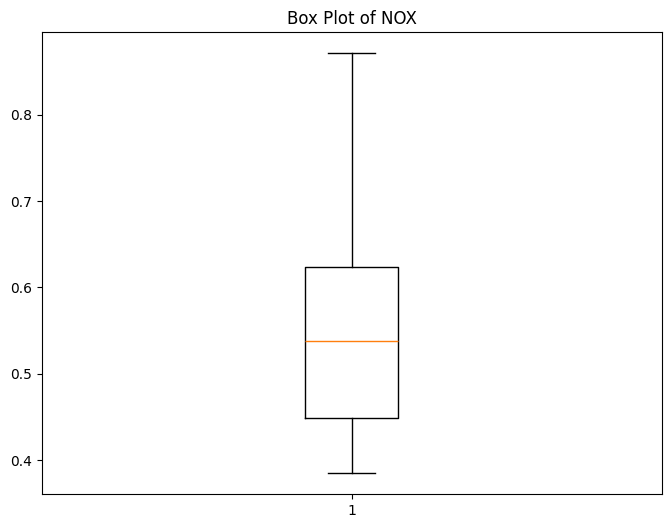

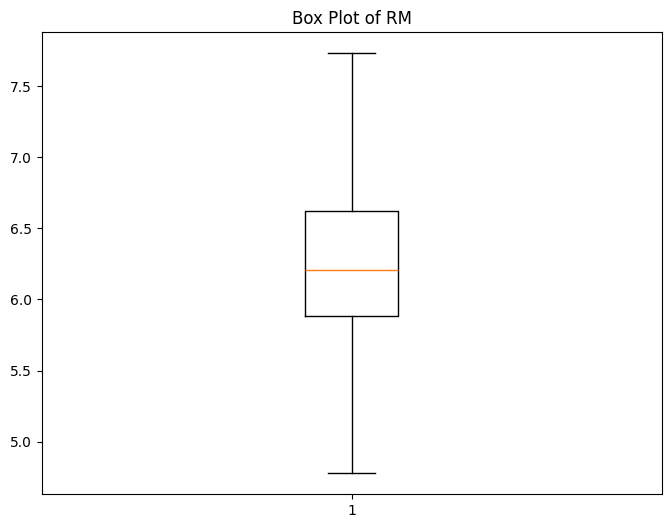

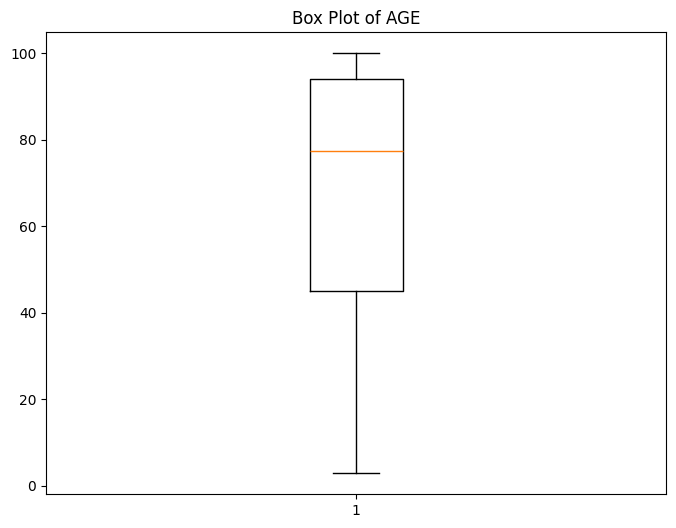

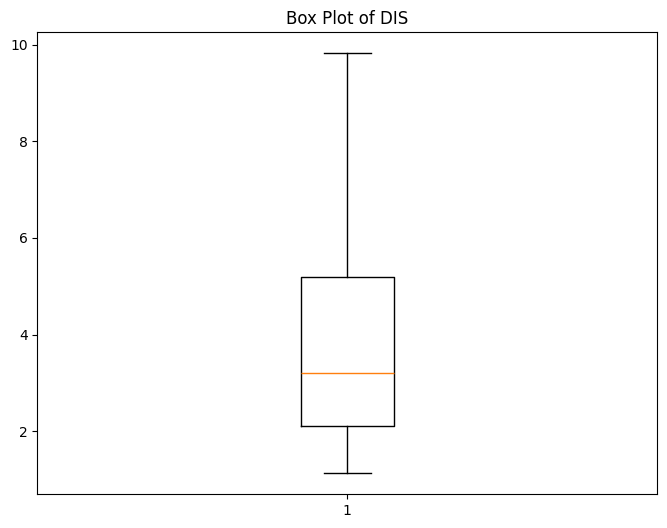

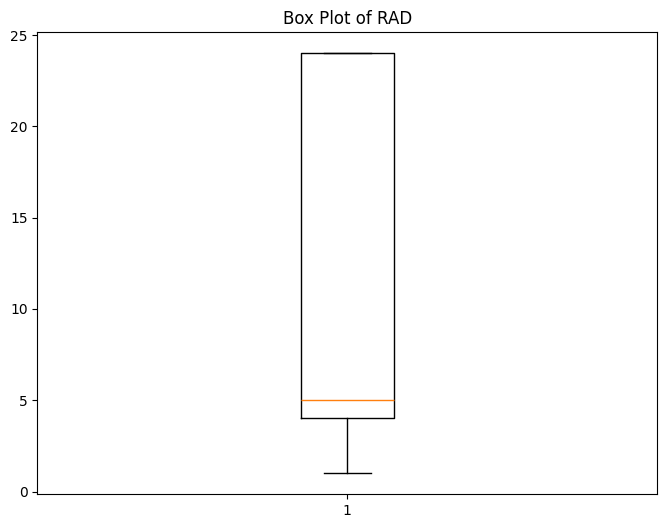

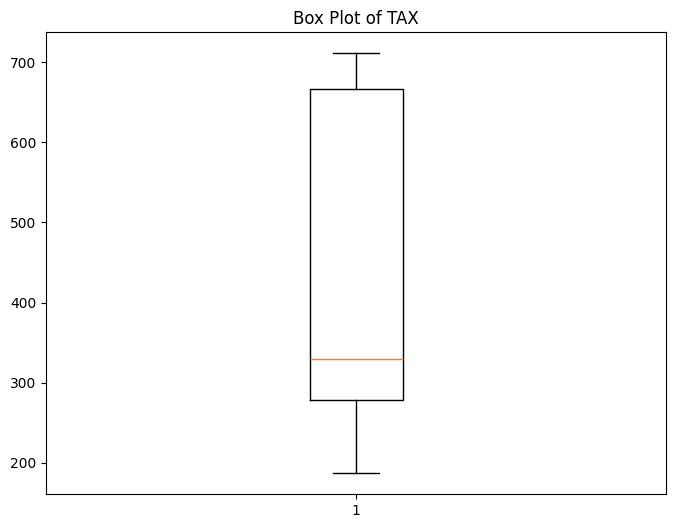

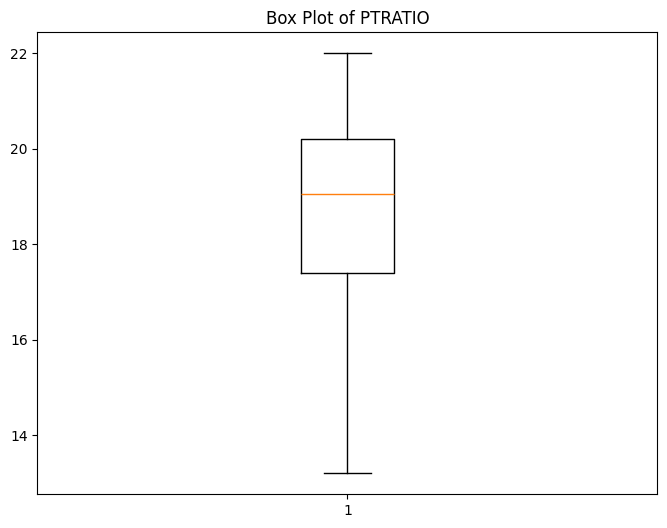

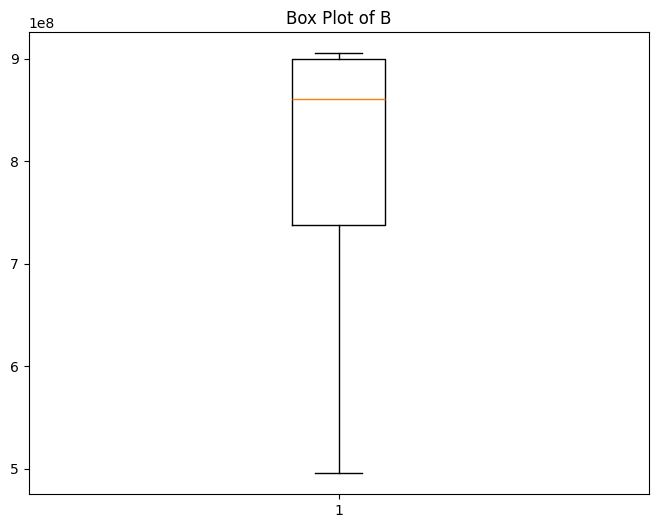

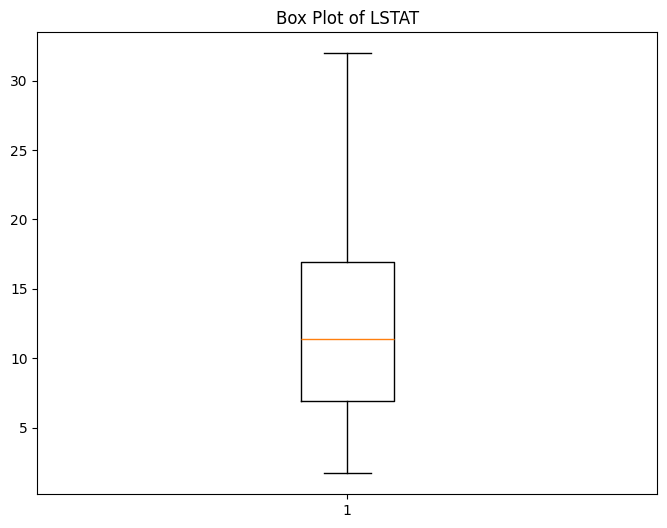

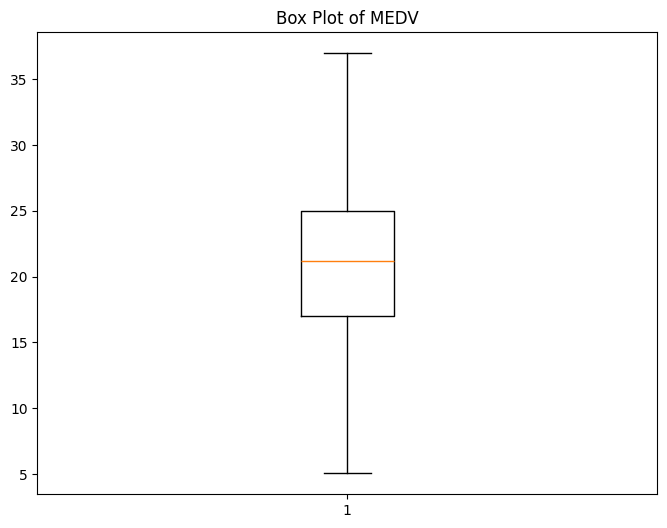

In [13]:
import matplotlib.pyplot as plt


for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  plt.boxplot(df2[col])
  #plt.boxplot(df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

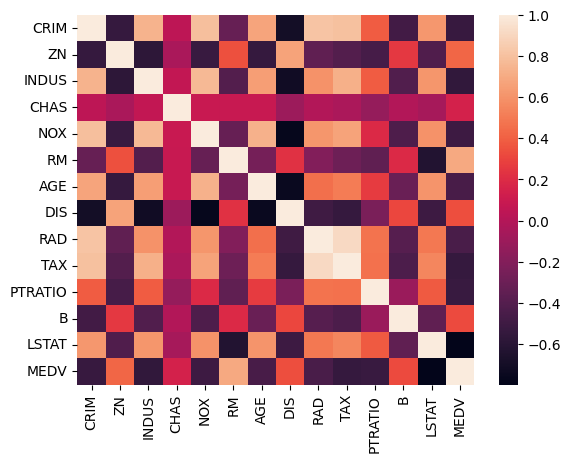

In [14]:
import seaborn as sns

sns.heatmap(df2.corr())
plt.show()

In [15]:
for col in df2.columns:
  if col!='MEDV' and col!='CHAS':
    if(df2[col].corr(df2['MEDV']) > 0.5 or df2[col].corr(df2['MEDV']) < -0.5):
      print(col,df2[col].corr(df2['MEDV']) )


CRIM -0.5307367741877737
INDUS -0.5611741343647444
NOX -0.5065052235724765
RM 0.697644543845302
TAX -0.5435451053421058
PTRATIO -0.5239929079190644
LSTAT -0.7972004546843471


In [16]:
high_corr = ['LSTAT','RM','PTRATIO','NOX','INDUS','TAX','CRIM']

In [17]:
import pandas as pd

correlation_matrix = pd.DataFrame(index=high_corr, columns=high_corr)

for col in high_corr:
    for col2 in high_corr:
        if col != col2:
            correlation_matrix.loc[col, col2] = df2[col].corr(df2[col2])
        else:
            correlation_matrix.loc[col, col2] = 1.0

print(correlation_matrix)


            LSTAT        RM   PTRATIO       NOX     INDUS       TAX      CRIM
LSTAT         1.0 -0.634425  0.376433  0.595619  0.608158  0.545598  0.620006
RM      -0.634425       1.0 -0.353695 -0.322413 -0.408704 -0.292737 -0.325585
PTRATIO  0.376433 -0.353695       1.0  0.190159  0.382359  0.462693  0.385975
NOX      0.595619 -0.322413  0.190159       1.0  0.763651  0.668023  0.790966
INDUS    0.608158 -0.408704  0.382359  0.763651       1.0   0.72076   0.73437
TAX      0.545598 -0.292737  0.462693  0.668023   0.72076       1.0  0.797261
CRIM     0.620006 -0.325585  0.385975  0.790966   0.73437  0.797261       1.0


In [18]:
import random

def stratified_train_test_split(df, target_col, test_size=0.2, random_seed=None):

    if random_seed is not None:
        random.seed(random_seed)  # Set random seed for reproducibility

    train_list = []
    test_list = []


    unique_classes = df[target_col].unique()
    print(unique_classes)

    for cls in unique_classes:
        print(cls)
        class_subset = df[df[target_col] == cls]

        # Shuffle the indices
        indices = list(class_subset.index)
        random.shuffle(indices)

        # Calculate split index
        split_index = int(len(indices) * (1 - test_size))

        # Split the indices
        train_indices = indices[:split_index]
        test_indices = indices[split_index:]

        # Append to train and test lists
        train_list.append(df.loc[train_indices])
        test_list.append(df.loc[test_indices])

    # Concatenate all class-wise splits
    train_df = pd.concat(train_list).reset_index(drop=True)
    test_df = pd.concat(test_list).reset_index(drop=True)

    return train_df, test_df

# Example usage
train, test = stratified_train_test_split(df2, target_col='CHAS', test_size=0.2, random_seed=42)

# Check proportion of CHAS values in train and test sets
print("Training Set CHAS Distribution:\n", train['CHAS'].value_counts(normalize=True))
print("Testing Set CHAS Distribution:\n", test['CHAS'].value_counts(normalize=True))

# Display train and test sets
print("Training Set:")
print(train.head())
print("\nTesting Set:")
print(test.head())


[0 1]
0
1
Training Set CHAS Distribution:
 CHAS
0    0.930693
1    0.069307
Name: proportion, dtype: float64
Testing Set CHAS Distribution:
 CHAS
0    0.931373
1    0.068627
Name: proportion, dtype: float64
Training Set:
       CRIM         ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0 -2.320968 -67.145389   6.91     0  0.448  6.770   2.9  5.7209    3  233   
1 -4.358293   2.653493   1.25     0  0.429  6.939  34.5  8.7921    1  335   
2  2.275792 -67.145389  18.10     0  0.713  6.208  95.0  2.2222   24  666   
3  0.568749 -67.145389  19.58     0  0.605  5.877  79.2  2.4259    5  403   
4 -4.370725   2.470155  15.04     0  0.464  6.211  28.9  3.6659    4  270   

   PTRATIO             B  LSTAT  MEDV  
0     17.9  8.129416e+08   4.84  26.6  
1     19.7  8.477826e+08   5.89  26.6  
2     20.2  4.956215e+08  15.17  11.7  
3     14.7  4.956215e+08  12.14  23.8  
4     18.2  9.005633e+08   6.21  25.0  

Testing Set:
       CRIM         ZN  INDUS  CHAS    NOX      RM   AGE     D

In [19]:
for col in high_corr:
  print(df2[col].max(),df2[col].min())

31.962500000000006 1.73
7.730500000000001 4.778499999999999
22.0 13.199999999999998
0.871 0.385
27.74 0.46
711 187
3.5165954836021367 -6.843991124675121


In [20]:
for col in high_corr:
  print(train[col].max(),train[col].min())

31.962500000000006 1.73
7.730500000000001 4.778499999999999
22.0 13.199999999999998
0.871 0.385
27.74 0.46
711 187
3.5165954836021367 -6.843991124675121


In [21]:
for col in high_corr:
  print(col if (train[col] == 'NaN').any() else 'notCOl')

notCOl
notCOl
notCOl
notCOl
notCOl
notCOl
notCOl


In [59]:
from sklearn.preprocessing import StandardScaler

class MultiFeatureLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (-2/n_samples) * np.dot(X.T, (y - y_pred))
            db = (-2/n_samples) * np.sum(y - y_pred)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


scaler = StandardScaler()
X_train = scaler.fit_transform(train[high_corr].values)
y_train = train['MEDV'].values

# Train Model
model = MultiFeatureLinearRegression(learning_rate=0.01, epochs=10000)
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)

print("Weights:", model.weights)
print("Intercept:", model.bias)


Weights: [-3.65990758  2.191761   -1.65035246 -0.77686023  0.21788106 -1.04660875
  0.82376269]
Intercept: 21.95798267326724


In [63]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calculate MSE
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE):", mse)

# Print actual vs predicted values for comparison
print("\nActual vs Predicted Values:")
for actual, predicted in zip(y_train[:10], y_pred_train[:10]):  # Display first 10 samples
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")


Mean Squared Error (MSE): 14.557717616650333

Actual vs Predicted Values:
Actual: 26.60, Predicted: 29.33
Actual: 26.60, Predicted: 26.57
Actual: 11.70, Predicted: 17.68
Actual: 23.80, Predicted: 24.13
Actual: 25.00, Predicted: 25.63
Actual: 36.96, Predicted: 35.09
Actual: 24.80, Predicted: 26.47
Actual: 36.96, Predicted: 32.88
Actual: 21.90, Predicted: 13.59
Actual: 24.30, Predicted: 23.74


In [64]:
mse_test_data = mean_squared_error(test['MEDV'].values, model.predict(scaler.transform(test[high_corr].values)))
print("Mean Squared Error (MSE) on Test Data:", mse_test_data)
print("\nActual vs Predicted Values on Test Data:")
for actual, predicted in zip(test['MEDV'].values[:10], model.predict(scaler.transform(test[high_corr].values))[:10]):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")


Mean Squared Error (MSE) on Test Data: 13.719998178540619

Actual vs Predicted Values on Test Data:
Actual: 19.90, Predicted: 17.60
Actual: 8.80, Predicted: 4.72
Actual: 16.70, Predicted: 17.15
Actual: 17.40, Predicted: 15.98
Actual: 13.10, Predicted: 14.18
Actual: 20.40, Predicted: 18.56
Actual: 29.80, Predicted: 29.72
Actual: 33.30, Predicted: 34.06
Actual: 22.90, Predicted: 24.15
Actual: 31.10, Predicted: 30.18
